In [1]:
from matplotlib import pyplot as plt
import numpy as np

Условие задачи

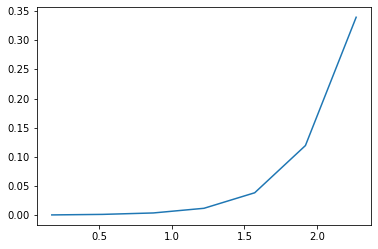

In [2]:
x = np.array([0.17453, 0.5236, 0.87267, 1.22173, 1.5708, 1.91986, 2.26893])
y = np.array([25/100000, 0.00116, 0.00361, 0.01162, 0.03827, 0.11933, 0.33960])
plt.plot(x, y)

МНК

In [3]:
degree = 3
def squared_error(y, poly): #Квадратичная ошибка
    poly = np.array(poly)
    return (y - poly).dot(y - poly)

def gradient_descent(x, y, eta=0.01): # Градиентный спуск для нахождения минимума ошибки
    w = np.zeros(degree+1)
    X = np.ones(len(x))
    for i in range(1, degree+1):
        X = np.vstack((X, x**i)) #Создаем матрицу значений в столбцах значения x, x^2, x^3
    iter_num = 0
    while(squared_error(y, X.T.dot(w)) > 10**(-4)):
        w_prev = w.copy()
        w -= 2*eta/len(y)*X.dot(X.T.dot(w_prev) - y)
        if((w_prev - w).dot(w_prev - w) < 10**(-20)):
            break
        iter_num += 1
    print('square error:', squared_error(y, X.T.dot(w)))
    print('iterations:', iter_num)
    return w

In [4]:
w = gradient_descent(x, y)

square error: 0.0005566973690804141
iterations: 320888


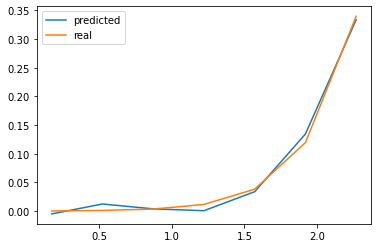

In [5]:
X = np.ones(len(x))
for i in range(1, degree+1):
    X = np.vstack((X, x**i))
new_y = X.T.dot(w)
plt.plot(x, new_y, label='predicted')
plt.plot(x, y, label='real')
plt.legend()

Многочлен в форме Ньютона

In [6]:
def b(x, y):
    b_1   = y.copy()
    b_2   = []
    b     = []
    n     = len(x)
    for i in range(n):
        for j in range(1, n - i):
            b_2.append((b_1[j] - b_1[j-1])/(x[j+i]- x[j-1]))
        b.append(b_1[0])
        b_1 = b_2.copy()
        b_2 = []
    return b

def newton_poly(x_0):
    B    = b(x,y)
    poly = B[0]
    k    = 1
    for i in range(1, len(x_0)):
        k *= x_0 - x_0[i-1]
        poly += B[i]*k
    return poly

In [7]:
X = np.ones(len(x))
for i in range(1, len(x)):
    X = np.vstack((X, x**i))
A = np.linalg.inv(X.T) @ y # Коэффициенты перед степенями
#Многочлен 6-ой степени
print('Значение многочлена Ньютона в точках заданных:', newton_poly(x))
print('Зачения заданных y:', y)
print('Коэффициенты многочлена Ньютона:', 
          '{:f}x^6 + {:f}x^5 + {:f}x^4 + {:f}x^3 + {:f}x^2  + {:f}x + {:f}'.format(A[6], A[5], A[4], A[3], A[2], A[1], A[0]))

Значение многочлена Ньютона в точках заданных: [2.5000e-04 1.1600e-03 3.6100e-03 1.1620e-02 3.8270e-02 1.1933e-01
 3.3960e-01]
Зачения заданных y: [2.5000e-04 1.1600e-03 3.6100e-03 1.1620e-02 3.8270e-02 1.1933e-01
 3.3960e-01]
Коэффициенты многочлена Ньютона: 0.009747x^6 + -0.039316x^5 + 0.079699x^4 + -0.081973x^3 + 0.047234x^2  + -0.011016x + 0.001102


Построение сплайнов

In [8]:
def poly(A, x):
    poly = A[0]
    for i in range(1, len(A)):
        poly += A[i]*x**i
    return poly
#Производная многочлена Ньютона:
def derivative(A, x):
    result = A[1]
    for i in range(2, len(A)):
        result+= i*A[i]*x**(i-1)
    return result

#Сплайн третьей степени
def spline(a, x):
    return a[3] + a[2]*x + a[1]*(x**2) + a[0]*(x**3)
def X_arr(x1, x2):
    return np.array([[x1**3, x2**3, 3*(x1**2), 3*(x2**2)], [x1**2, x2**2, 2*x1, 2*x2], 
                     [x1, x2, 1, 1], [1, 1, 0, 0]])
def P(x1, x2, A):
    return np.array([poly(A, x1), poly(A, x2), derivative(A, x1), derivative(A, x2)])
#Коэффициенты сплайна
def spline_coeffs(x1, x2, A):
    X_     = X_arr(x1, x2)
    b      = P(x1, x2, A)
    coeffs = np.linalg.inv(X_.T) @ b
    return coeffs[::-1]

In [9]:
def spline_draw(x1, x2, y1, y2,):
    a = spline_coeffs(x1, x2, A)
    print('Сплайн между точками', x1, 'и', x2, ':', 
          '{:f}x^3 + {:f}x^2 + {:f}x + {:f}'.format(a[3], a[2], a[1], a[0]))
    plt.plot(x, spline(a, x), label='spline')
    plt.plot(x, y, label='real')
    plt.legend()

def splines(x, A):
    result = []
    for i in range(1,len(x)):
        result.append(spline_coeffs(x[i-1], x[i],A))
    return result

def s_3(x_0):
    for i in range(1,len(x)):
        if ((x_0 >= x[i-1]) and (x_0 <= x[i])):
            return poly(spline_coeffs(x[i-1], x[i], A), x_0)
    return 0

def spline_print(x, A):
    print(splines(x,A))

Сплайн между точками 0.17453 и 0.5236 : -0.011459x^3 + 0.018894x^2 + -0.006046x + 0.000791
Сплайн между точками 0.5236 и 0.87267 : 0.015386x^3 + -0.021794x^2 + 0.014484x + -0.002657
Сплайн между точками 0.87267 и 1.22173 : 0.045910x^3 + -0.103700x^2 + 0.087700x + -0.024461
Сплайн между точками 1.22173 и 1.5708 : 0.129860x^3 + -0.416859x^2 + 0.476975x + -0.185711
Сплайн между точками 1.5708 и 1.91986 : 0.316980x^3 + -1.307583x^2 + 1.890164x + -0.933008
Сплайн между точками 1.91986 и 2.26893 : 0.657017x^3 + -3.278465x^2 + 5.697814x + -3.384978
[array([ 0.00079054, -0.0060456 ,  0.01889365, -0.01145878]), array([-0.00265729,  0.01448368, -0.02179387,  0.01538556]), array([-0.02446113,  0.08769987, -0.10369971,  0.04590974]), array([-0.18571058,  0.47697466, -0.41685893,  0.1298597 ]), array([-0.93300806,  1.89016436, -1.30758318,  0.31698009]), array([-3.38497796,  5.69781423, -3.27846512,  0.65701674])]


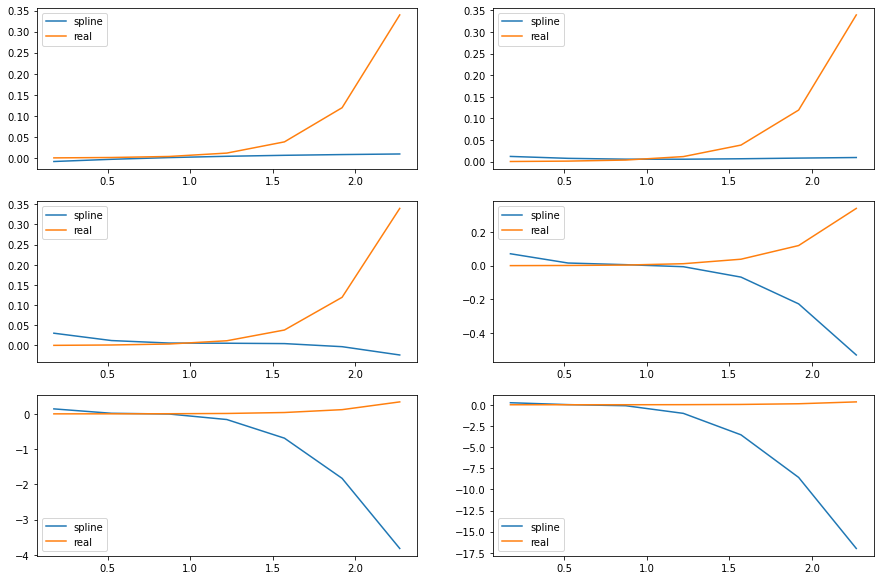

In [10]:
plt.figure(figsize=(15, 35))
plot_number = 0
for i in range(1, len(x)):
    plot_number += 1
    plt.subplot(10, 2, plot_number)
    spline_draw(x[i-1], x[i], y[i-1], y[i])
spline_print(x,A)

In [ ]:
value = float(input())
print("Значение сплайна в точке ", value,"равно ", s_3(value))
print("Значение интерполяционного многочлена в точке ", value,"равно ", poly(A, value))